# Author

Created by HakHyeon Song.

Artificial Intelligence, Fall Semester, 2021.

## k-means clustering 

**데이터를 k개의 군집(Cluster)으로 묶는(Clusting) 알고리즘 <br>
k는 묶을 군집(클러스터)의 개수를 의미하고 means는 평균을 의미**

1. 군집의 중심 위치 선정
2. 군집 중심을 기준으로 군집 재구성 
3. 군집별 평균 위치 결정 
4. 군집 평균 위치로 군집 중심 조정
5. 수렴할 때까지 2-4 과정 반복  

### Libraries 불러오기 ###

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import random

### 데이터 생성 ###
- 랜덤 데이터 생성 
- 3개의 중심을 기준으로 정규 분포를 따르는 임의의 데이터 생성 

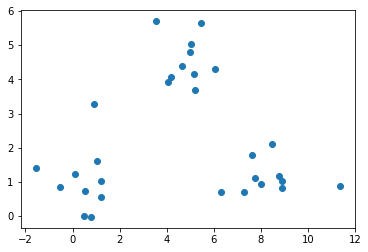

In [77]:
center_1 = np.array([1,1])
center_2 = np.array([5,5])
center_3 = np.array([8,1])

data = np.random.randn(10,2) + center_1
data = np.concatenate((data, np.random.randn(10,2) + center_2))
data = np.concatenate((data, np.random.randn(10,2) + center_3))

plt.scatter(data[:,0], data[:, 1])

### k-means 함수 정의 ###
1. 군집의 중심 위치 선정
2. 군집 중심을 기준으로 군집 재구성 
3. 군집별 평균 위치 결정 
4. 군집 평균 위치로 군집 중심 조정
5. 수렴할 때까지 2-4 과정 반복  

In [78]:
## 따로 함수 없이 아래 반복문으로 해결하였습니다.

### kmeans 함수에 data 입력, k=3 ###

군집 중심  [[ 4.63061556  4.39089573]
 [-0.54447353  0.85134106]
 [ 8.88487936  0.81183368]]


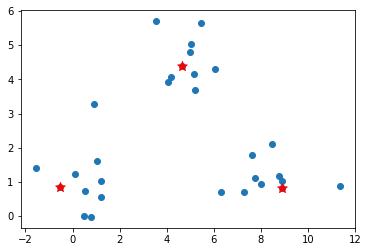

In [79]:
k = 3
m = data.shape[0]

mu = data[np.random.randint(0, m, k), :]
pre_mu = mu.copy()
print('군집 중심 ', end=' ')
print(mu)

plt.scatter(data[:,0], data[:,1])
plt.scatter(mu[:,0],mu[:,1], marker='*', c='r', s=100)
plt.show()

In [80]:
y = np.empty([m,1])

# K-means

for _ in range(data.size):
    for i in range(m):
        d0 = np.linalg.norm(data[i,:] - mu[0,:], 2)
        d1 = np.linalg.norm(data[i,:] - mu[1,:], 2)
        d2 = np.linalg.norm(data[i,:] - mu[2,:], 2)
        y[i] = np.argmin([d0, d1, d2])

    err = 0
    for i in range(k):
        mu[i,:] = np.mean(data[np.where(y == i)[0]], axis = 0)
        err += np.linalg.norm(pre_mu[i,:] - mu[i,:], 2)
    
    pre_mu = mu.copy()
    
    if err < 1e-10:
        break

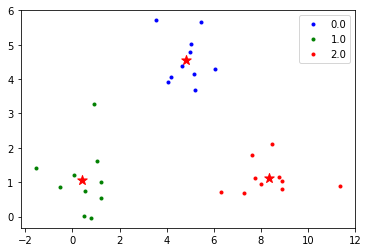

In [81]:
x0 = data[np.where(y==0)[0]]
x1 = data[np.where(y==1)[0]]
x2 = data[np.where(y==2)[0]]

plt.plot(x0[:,0], x0[:,1], 'b.', label='0.0')
plt.plot(x1[:,0], x1[:,1], 'g.', label='1.0')
plt.plot(x2[:,0], x2[:,1], 'r.', label='2.0')
plt.legend()
plt.scatter(mu[:,0],mu[:,1], marker='*', c='r', s=100)
plt.show()